This is the start of my capstone project for the Google analytics certificate.

I will follow the 7 phases used in the certificate: **ask**, **prepare**, **process**, **analyze**, **share** and **act**.

Let's start with the context provided.

## Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## Characters and teams

* Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

* Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

* Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.

* Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

## About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

## Questions
Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

Moreno has assigned you the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?
You will produce a report with the following **deliverables**:
1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis

# Ask

### Guiding questions 
* Whats is the problem you are trying to solve?

The problem I am trying to solve is to determine the differences in use of bikes between causal riders and annual members.
* How can your insight drive business decisions?

The insights from my analysis will help drive business decisions by helping the marketing team to create strategies to convert casual riders into annual members.

### Key tasks
1. Identify the business task

The business task is to define the differences between casual riders and annual members with the aim to use this information to convert casual riders into annual members

2. Consider key stakeholders

The key stakeholders are the director of marketing and the executive team. 

### Deliverables
**A clear statement of the business task.**

The business task is to convert casual riders into annual members, by better understanding the differences between them.

# Prepare

The data that I will be using has been made available as public data by Motivate International inc. and it is avalaible for download [here](https://divvy-tripdata.s3.amazonaws.com/index.html). The data is avalible under this [license](https://ride.divvybikes.com/data-license-agreement).

The dataset is composed of 12 months of data stored in 12 .csv files and has been downloaded from [this](https://www.kaggle.com/datasets/evangower/cyclistic-case-study) Kaggle dataset.

I will first upload the data and store them.



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon


sns.set_theme()

In [2]:
#import all the files in the dataset folder

path = r"/kaggle/input/062022-052023-cyclistic-trip-data"

filenames = glob.glob(path + "/*.csv")

datanames = ["data_1", "data_2", "data_3", "data_4", "data_5", "data_6", "data_7", "data_8",
             "data_9", "data_10","data_11", "data_12"]
x=0
dts = {}  #create a dictionary to contain the datasets

for file in filenames:
    dts[datanames[x]] = pd.read_csv(file, header = 0)
    x+=1

Now that the data is stored, I will do some preparatory data exploration. I will first check the columns of the first dataset (corresponding to 2022_07).


In [3]:
dts["data_1"].columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

The data_1 dataset contains 13 columns. I can use this fact to check that all the other dataset contain the same number of columns, that are probably going to be the same columns. 

In [4]:
for key in dts:
    print(len(dts[key].columns))

13
13
13
13
13
13
13
13
13
13
13
13


All the datasets contain 13 columns. I can use the function head() to get an understanding of the dataset more in detail.

In [5]:
dts["data_1"].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member


The last column, "member_casual", is probably going to be very important later. Probably quite important will be also the times for the trips (maybe there will be some trend for the lenght in time of the trip) and maybe also the station names (maybe some are more frequently used than others).

It seems, at a first glance, that some of these information might not be very consistent. For example, I see that Buckingham Fountain (Temp) presents this (Temp) not present in other names and, more importantly, it does not look like the station ids are consistent.

### Deliverable: 

A description of all data sources used.

The data sources are 12 .csv datasets, each one referring to a single month of the year. These datasets present 13 columns containing information related to the individual bikeride.

# Process

Now, I will move to processing my data before my data analysis. I will focus on sorting the data, filtering them and cleaning them to ensure the best analysis possible. 

I will start by merging all the datasets in a single one.

In [6]:
dts = pd.concat(dts.values())

In [7]:
dts.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,41.907066,-87.667252,41.889177,-87.638506,member
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,41.869621,-87.623981,41.872773,-87.623981,casual
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,41.869621,-87.623981,41.795264,-87.596471,casual
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,41.891466,-87.626761,41.936253,-87.652662,member


In [8]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829030 entries, 0 to 337734
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 622.6+ MB


Looking at the dts.info() output, I can see that I will probably not use some columns, so I can drop them. I also think that some values are not in the correct format, so I will probably also try to solve that.

In [9]:
to_drop = ["start_lat", "start_lng", "end_lat", "end_lng"]

dts_1 = dts.copy() #copied the dataset so we do not modify the original one
dts_1.head()
dts_1.drop(to_drop, axis = 1, inplace = True) #drop columns that are not used.

In [10]:
print(dts_1.isnull().sum()) #there are a lot of NA in the dataset 

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    834545
start_station_id      834677
end_station_name      891757
end_station_id        891898
member_casual              0
dtype: int64


In [11]:
print(dts_1.notnull().sum()) #let's also check for not null, to be sure

ride_id               5829030
rideable_type         5829030
started_at            5829030
ended_at              5829030
start_station_name    4994485
start_station_id      4994353
end_station_name      4937273
end_station_id        4937132
member_casual         5829030
dtype: int64


Since I know that there are some N/A values, let's drop those rows, because they are lacking some info and it's probably safer to remove them than to keep them.

In [12]:
dts_1.dropna(inplace = True) #drop NA values
dts_1.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
dtype: int64

In [13]:
duplicate = dts_1[dts_1.duplicated()] #check for duplicates: there are no duplicates in the dataset.
print(len(duplicate))


0


Now that I have done a basic cleaning of the data, I will continue with creating a few new columns that will help with the analysis. I will create a column named "ride_length", formatted as HH:MM:SS, and a column named "day_of_the_week", formatted as a numeral.
First, I have to correct the column for the start and end of ride to be a date.

In [14]:
dts_1["started_at"] = pd.to_datetime(dts_1["started_at"]) #convert to datetime
dts_1["ended_at"] = pd.to_datetime(dts_1["ended_at"]) #convert to datetime

dts_1["ride_length"] = (dts_1["ended_at"]-dts_1["started_at"]) #create ride_length columns

In [15]:
dts_1["day_of_the_week"] = dts_1["started_at"].dt.dayofweek+1 #create a columns with day 
                                                                #of week form 1 to 7

In [16]:
dts_1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,day_of_the_week
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,member,0 days 00:11:45,2
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,casual,0 days 00:01:53,2
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,casual,0 days 00:07:43,7
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,casual,0 days 00:58:29,7
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,member,0 days 00:26:18,3


In [17]:
#apparently some data for ride_length are negative and some values are over 1 day. I will 
#remove the data lower than 30 seconds and remove the data over 1 day.

dts_1.drop(dts_1[dts_1["ride_length"] < pd.Timedelta(seconds = 30)].index, inplace = True)
dts_1.drop(dts_1[dts_1["ride_length"] > pd.Timedelta(days = 1)].index, inplace = True)
dts_1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,day_of_the_week
0,954144C2F67B1932,classic_bike,2022-07-05 08:12:47,2022-07-05 08:24:32,Ashland Ave & Blackhawk St,13224,Kingsbury St & Kinzie St,KA1503000043,member,0 days 00:11:45,2
1,292E027607D218B6,classic_bike,2022-07-26 12:53:38,2022-07-26 12:55:31,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,casual,0 days 00:01:53,2
2,57765852588AD6E0,classic_bike,2022-07-03 13:58:49,2022-07-03 14:06:32,Buckingham Fountain (Temp),15541,Michigan Ave & 8th St,623,casual,0 days 00:07:43,7
3,B5B6BE44314590E6,classic_bike,2022-07-31 17:44:21,2022-07-31 18:42:50,Buckingham Fountain (Temp),15541,Woodlawn Ave & 55th St,TA1307000164,casual,0 days 00:58:29,7
4,A4C331F2A00E79E0,classic_bike,2022-07-13 19:49:06,2022-07-13 20:15:24,Wabash Ave & Grand Ave,TA1307000117,Sheffield Ave & Wellington Ave,TA1307000052,member,0 days 00:26:18,3
...,...,...,...,...,...,...,...,...,...,...,...
337727,03005DDB0F2F28E4,classic_bike,2022-11-09 14:22:29,2022-11-09 14:25:18,Clifton Ave & Armitage Ave,TA1307000163,Sheffield Ave & Webster Ave,TA1309000033,member,0 days 00:02:49,3
337731,B0B4E85DA43A9194,classic_bike,2022-11-22 16:57:53,2022-11-22 17:31:29,Franklin St & Jackson Blvd,TA1305000025,Sheffield Ave & Wrightwood Ave,TA1309000023,casual,0 days 00:33:36,2
337732,8D148DD47B59530B,classic_bike,2022-11-06 13:04:05,2022-11-06 13:13:33,Michigan Ave & Ida B Wells Dr,TA1305000010,Shedd Aquarium,15544,casual,0 days 00:09:28,7
337733,0D1170BA18FD33D1,classic_bike,2022-11-06 09:41:29,2022-11-06 15:17:17,Halsted St & 18th St,13099,Shedd Aquarium,15544,casual,0 days 05:35:48,7


I think that for the moment the cleaning of the data is complete.

### Deliverables
Documentation of any cleaning or manipulation of data.

I took the steps above to check and clean the dataset.

# Analyze

Now that the data are clean, I will perform some analysis to find some insight from them and to summarize them. I used the describe() function to get some basic descriptive values.

In [18]:
dts_1.describe()

,ride_length,day_of_the_week
count,4080728,4.080728e+06
mean,0 days 00:16:29.552227690,4.036251e+00
std,0 days 00:30:36.343395356,1.952390e+00
min,0 days 00:00:30,1.000000e+00
25%,0 days 00:05:57,2.000000e+00
50%,0 days 00:10:20,4.000000e+00
75%,0 days 00:18:24,6.000000e+00
max,0 days 23:59:22,7.000000e+00


In [19]:
#dts_1.groupby(["member_casual"]).value_counts(normalize = True)
dts_1.member_casual.value_counts(normalize = True)*100

member    60.807508
casual    39.192492
Name: member_casual, dtype: float64

I can see that the mean for the ride length is around 16 minutes, with the min being 30 seconds and the max being almost one day. I want to see if these values are different if I only consider casual or members. I can visualize this by using a pivot table: I will add the mean, the min and the max. I cans also see that 60% of my dataset is composed of rides from members.

In [20]:
table_1 = pd.pivot_table(dts_1, values = "ride_length", index = "member_casual", 
                       aggfunc = {"count", np.mean, min, max})
table_1

,count,max,mean,min
member_casual,,,,
casual,1599339,0 days 23:59:22,0 days 00:22:52.538971412,0 days 00:00:30
member,2481389,0 days 23:56:20,0 days 00:12:22.704338981,0 days 00:00:30


Interestingly, the count for the members is almost double the one for the casual users. The max and the min are comparable (both probably not being very indicative), but we can see that the casual riders use the bikes in average for longer. This suggests that the members use the bikes more often, but for shorter rides. 

We can also check if there are differences in the behaviours related to the days of the week. 

In [21]:
table_2 = pd.pivot_table(dts_1, values = "ride_length", index = ["day_of_the_week","member_casual"], 
                       aggfunc = {"count", np.mean})
table_2

count                      mean
day_of_the_week member_casual                                  
1               casual         178344 0 days 00:22:48.896525815
                member         338129 0 days 00:11:44.082462610
2               casual         184642 0 days 00:20:32.758001971
                member         396416 0 days 00:11:51.527625020
3               casual         199309 0 days 00:19:48.921849991
                member         412470 0 days 00:11:50.709304919
4               casual         213812 0 days 00:20:22.566450900
                member         398873 0 days 00:11:57.810074885
5               casual         236522 0 days 00:21:57.633636617
                member         349625 0 days 00:12:11.585049696
6               casual         321613 0 days 00:25:36.751602080
                member         311049 0 days 00:13:54.231336541
7               casual         265097 0 days 00:26:21.122690939
                member         274827 0 days 00:13:49.897251725

As could have been expected, the members use the bikes more than the casual riders during the week, while the usage is comparable during the weekends. 

I also want to analyze the trends related to the time of the year.

In [22]:
dts_1.groupby([dts_1.started_at.dt.month, "member_casual"])["started_at"].count().unstack(fill_value=0) #unstack creates a dataframe from a multiseries
#grouping the data for both the month of the year and the type of membership.

member_casual,casual,member
started_at,,
1,25521,102083
2,28304,100495
3,40919,133477
4,99677,191664
5,161237,259091
6,269835,302654
7,289362,304351
8,251145,311210
9,203388,288858


During the summer months people use more bikes, as expected. The use from members is always higher, and it stays much higher during the winter months. 

 # Share
 
Now that I am defined some differences in the usage, I will create some visualizations to share my findings and make them clearer. 

First of all, let's start with the differences in number of rides per membership type.


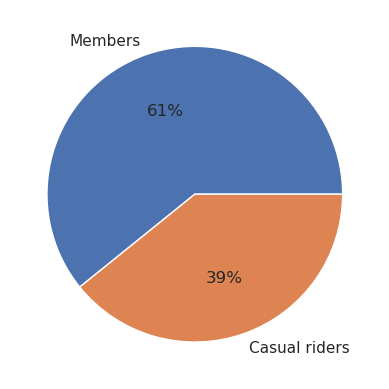

In [23]:
plt.pie(dts_1.member_casual.value_counts(normalize = True), labels = ["Members", "Casual riders"], autopct='%.0f%%')
plt.show()

From the pie chart is clear that most of the rides are made by members. This is good, but there is still almost 40% of rides that are made by non-members. 
Let's focus on the differences in behaviour between members and casual riders.

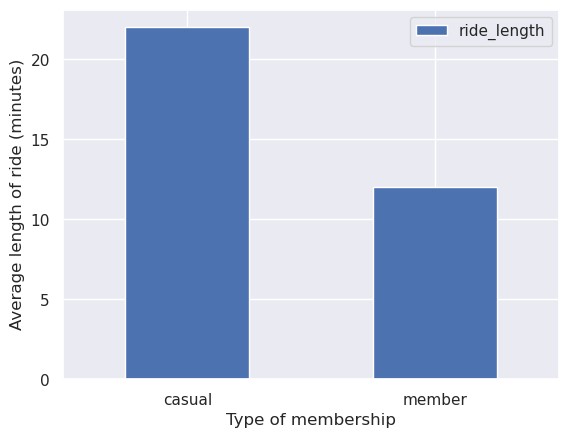

In [24]:
table_3 = pd.pivot_table(dts_1, values = "ride_length", index = "member_casual", #I was habing trouble with this, the problem was that I was trying to make a separate 
                         aggfunc = np.mean).astype('timedelta64[m]') #graph and that the time was in seconds

table_3.plot.bar(xlabel = "Type of membership",ylabel = "Average length of ride (minutes)", rot = 0)
plt.show()

The graph shws how the average length of ride for the members is shorter than the ones for the casual riders. This suggests that members use more rides, for shorter distances. 
I can also check the behaviour of the riders when linked to the day of the week and to the season.

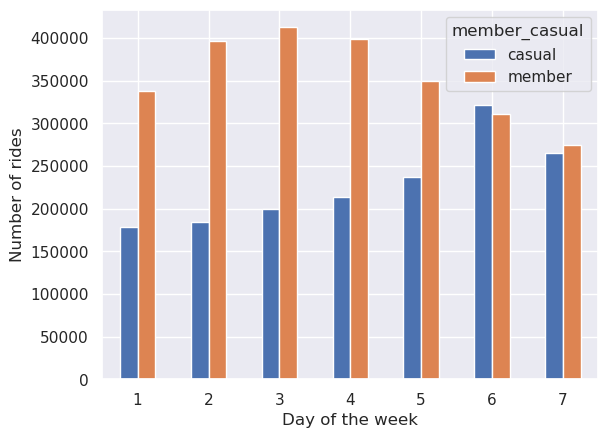

In [25]:
table_4 = pd.pivot_table(dts_1, values = "ride_length", index = "day_of_the_week", columns = "member_casual",
                       aggfunc = "count")

table_4.plot.bar(xlabel = "Day of the week", ylabel = "Number of rides", rot = 0)
plt.show()

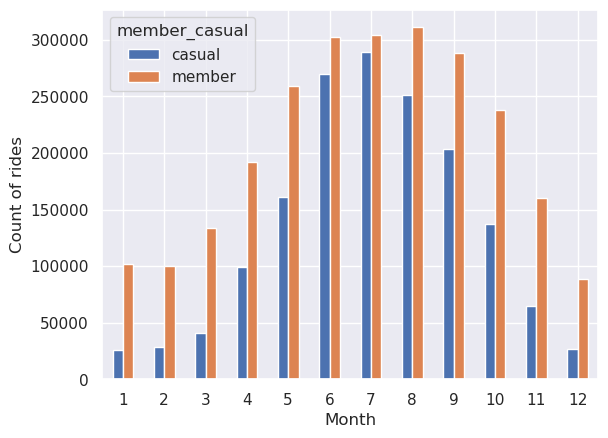

In [26]:
dts_1.groupby([dts_1.started_at.dt.month, "member_casual"])["started_at"].count().unstack(fill_value=0).plot.bar(xlabel = "Month",
                                                                                                              ylabel= "Count of rides",
                                                                                                              rot = 0)
plt.show()

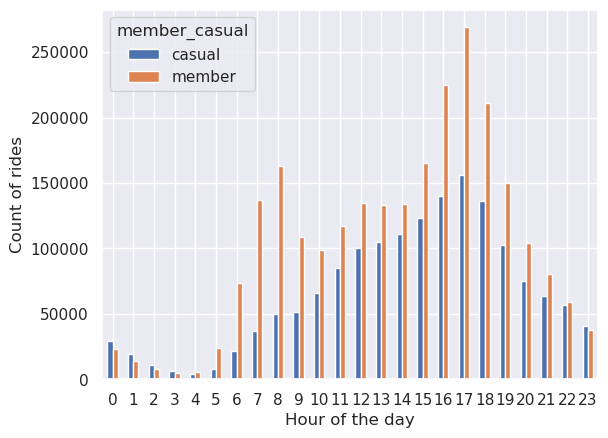

In [27]:
dts_1.groupby([dts_1.started_at.dt.hour, "member_casual"])["started_at"].count().unstack(fill_value=0).plot.bar(xlabel = "Hour of the day",
                                                                                                              ylabel= "Count of rides",
                                                                                                              rot = 0)
plt.show()

From the graph of the weekdays we can see how during the week the majority of rides are made by members, while during the weekends the members seem to use the bikes less while the casual riders.
From the distribution of rides during the year we can see that members use the bikes more consistently during the year, while casual riders mainly use them during the summer months.
In addition, the members consisntely use the bikes more than the casual riders at almost all the times in the day (apart from late night), but the contrast is much bigger when it comes to the commuting hours, suggesting that the members use the bikes for their commute.

## Deliverables

All the above visualizations.

Key insights:

* Almost 40% of rides are made by casual riders

* Members seem to use the bikes more frequently, for shorter periods of time.

* Members consistently use the bikes during the week and the year, while the casual riders use them more in the weekends and during the summer months.

* Members use the bikes very much for commuting.

# Act

## Deliverables

My top 3 suggestions:

1.  Since the members use bikes a lot for commuting, maybe a campaign focused on this could help convert casual riders to commuters.

2. Another difference is the use during the year: members use the bike more consistently during the year, while casual riders use them mainly during the summer. A winter campaign/sale could help convert casual riders.

3. Additional data could be useful: for example, it could be useful to divide the casual riders in single rides or in daily passes, because it might be easier to convert to members casual riders using daily passes.

